<a id=intro></a>
# CREDIT CARD RISK EVALUATION

Over the decade, frauds in the finance sector have immensely grown, with banks trying to attract customers to use credit cards with exciting offers. This has worked against the banks because customers needing help paying back are getting approved for credit cards. Designing a system that can predict a default payment based on user history can help banks to identify potential threats and block such users from getting approved for credit cards, loans, etc. This project focuses on implementing supervised machine learning algorithms in combination with regularization, feature reduction, and class imbalance handling techniques. We will compare the performances of these algorithms using suitable metrics and conclude the project by defining the best model in terms of complexity and computation efficiency.



In [1]:
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import KMeansSMOTE, SMOTE

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, auc, precision_recall_curve, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay

# Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
sns.set_style('whitegrid')
random_state = 42

import warnings
warnings.filterwarnings("ignore")

<a id='eda'></a>
# 1. Exploratory Data Analysis


<a id='description'></a>
## 1.1 DATA DESCRIPTION

This project uses default credit card client dataset from UCI repository.

The data was formed by collecting customer's default payments in Taiwan from April 2005 to september 2005 with over 30,000 payment entries.

This database employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. The following 23 variables used as explanatory variables :

- Client personal information:
    1. `LIMIT_BAL`: Amount of given credit (in *New Taiwan* dollars): it includes both the individual consumer credit and his/her family (supplementary) credit.
    2. `SEX`: 1 = male; 2 = female.
    3. `EDUCATION`: 1 = graduate school; 2 = university; 3 = high school; 4 = others.
    4. `MARRIAGE`: Marital status, 1 = married; 2 = single; 3 = others.
    5. `AGE`: Age in years.   
- History of past payments from April to September 2005, i.e., the delay of the past payment referred to a specific month:
    6. `PAY_0`: Repayment status in September, 2005.
    7. `PAY_2`: Repayment status in August, 2005.
    8. `PAY_3`: Repayment status in July, 2005.
    9. `PAY_4`: Repayment status in June, 2005.
    10. `PAY_5`: Repayment status in May, 2005.
    11. `PAY_6`: Repayment status in April, 2005.   
 
 The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; ...; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- Amount of bill statement (in *New Taiwan* dollars), i.e. a monthly report that credit card companies issue to credit card holders in a specific month:
    12. `BILL_AMT1`: Amount of bill statement in September, 2005.
    13. `BILL_AMT2`: Amount of bill statement in August, 2005.
    14. `BILL_AMT3`: Amount of bill statement in July, 2005.
    15. `BILL_AMT4`: Amount of bill statement in June, 2005.
    16. `BILL_AMT5`: Amount of bill statement in May, 2005.
    17. `BILL_AMT6`: Amount of bill statement in April, 2005.
- Amount of previous payment (in *New Taiwan* dollars):
    18. `PAY_AMT1`: Amount of previous payment in September, 2005.
    19. `PAY_AMT2`: Amount of previous payment in August, 2005.
    20. `PAY_AMT3`: Amount of previous payment in July, 2005.
    21. `PAY_AMT4`: Amount of previous payment in June, 2005.
    22. `PAY_AMT5`: Amount of previous payment in May, 2005.
    23. `PAY_AMT6`: Amount of previous payment in April, 2005.


In [2]:
# read dataset 
df = pd.read_csv('data/default_of_credit_card_clients.csv', header=1, index_col='ID')
df.rename(columns={'default payment next month':'default'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Next we will look for any missing values and deal with if any.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

<a id='cleaning'></a>
# 2. Data Cleaning

 First we will analyze columns related to client's personal information

In [4]:
df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']].describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.0,140000.0,240000.0,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.0,2.0,2.0,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.0,2.0,2.0,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.0,2.0,2.0,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.0,34.0,41.0,79.0


From above description, we can see that for EDUCATION and MARRIAGE both have undocumented categories. We will check the count of undocumented values across both categories and take a decision based on total count.

In [5]:
print("------------Description for EDUCATION------------------")
print(df['EDUCATION'].value_counts().sort_index())
print("------------Description for MARRIAGE------------------")
print(df['MARRIAGE'].value_counts().sort_index())

------------Description for EDUCATION------------------
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64
------------Description for MARRIAGE------------------
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64


As we can see, for EDUCATION column, nearly 450 values blong to category 4, 5 and 6, which is nerly 1.2% of entire dataset. Hence, we will group them as one categry 5.

On the other and, for MARRIAGE column, only 54 values are assigned to category 0 and 323 values are assigned category 3 (OTHERS). We will eliminate this as well.

In [6]:
print(f"Dataset size before:\t{df.shape[0]}")
df = df.drop(df[df["MARRIAGE"] == 0].index)
df = df.drop(df[df["MARRIAGE"] == 3].index)
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(0,5)
df.loc[:,'EDUCATION'] = df.loc[:,'EDUCATION'].replace(6,5)
print(f"Dataset size after:\t{df.shape[0]}")

Dataset size before:	30000
Dataset size after:	29623


Now we will inspect amount of bill statement and previous payments columns.

In [7]:
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe().T

,count,mean,std,min,25%,50%,75%,max
BILL_AMT1,29623.0,51367.263343,73817.041344,-165580.0,3526.0,22398.0,67497.0,964511.0
BILL_AMT2,29623.0,49324.592445,71367.819177,-69777.0,2967.5,21237.0,64252.0,983931.0
BILL_AMT3,29623.0,47170.621038,69543.225178,-157264.0,2648.5,20116.0,60397.0,1664089.0
BILL_AMT4,29623.0,43438.365189,64545.030993,-170000.0,2317.0,19081.0,54862.5,891586.0
BILL_AMT5,29623.0,40483.888330,60998.496767,-81334.0,1760.5,18128.0,50497.0,927171.0
BILL_AMT6,29623.0,39024.155825,59726.352985,-339603.0,1256.5,17099.0,49423.0,961664.0


In [8]:
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe().T

,count,mean,std,min,25%,50%,75%,max
PAY_AMT1,29623.0,5646.099315,15826.364173,0.0,1000.0,2109.0,5012.0,505000.0
PAY_AMT2,29623.0,5905.689532,22059.322235,0.0,832.0,2012.0,5000.0,1684259.0
PAY_AMT3,29623.0,5217.785437,16908.987034,0.0,390.0,1820.0,4542.5,896040.0
PAY_AMT4,29623.0,4826.435439,15335.281148,0.0,292.0,1500.0,4040.0,528897.0
PAY_AMT5,29623.0,4806.831145,15202.848008,0.0,256.0,1500.0,4085.5,426529.0
PAY_AMT6,29623.0,5240.627249,17818.162571,0.0,118.5,1500.0,4003.0,528666.0


We do not see any anomalies in both categories we will inspect columns belonging to history of past payments.

In [9]:
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe().T

,count,mean,std,min,25%,50%,75%,max
PAY_1,29623.0,-0.018465,1.124708,-2.0,-1.0,0.0,0.0,8.0
PAY_2,29623.0,-0.135098,1.197968,-2.0,-1.0,0.0,0.0,8.0
PAY_3,29623.0,-0.168214,1.196804,-2.0,-1.0,0.0,0.0,8.0
PAY_4,29623.0,-0.222530,1.168896,-2.0,-1.0,0.0,0.0,8.0
PAY_5,29623.0,-0.267292,1.133896,-2.0,-1.0,0.0,0.0,8.0
PAY_6,29623.0,-0.292813,1.150221,-2.0,-1.0,0.0,0.0,8.0


From above description, we can see that the columns have minimum value of -2 to  maximum 8 but according to dataset description provided by UCI, it should range between -1 to 9. We will correct this offset.

In [10]:
pay_features = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in pay_features:
    df.loc[df[col]<0, col] = -1
    df.loc[df[col]>=0, col] = df.loc[df[col]>=0, col] + 1
    df[col] = df[col].astype('int64')

df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe().T

,count,mean,std,min,25%,50%,75%,max
PAY_1,29623.0,0.791513,1.338628,-1.0,-1.0,1.0,1.0,9.0
PAY_2,29623.0,0.662762,1.395022,-1.0,-1.0,1.0,1.0,9.0
PAY_3,29623.0,0.633494,1.386074,-1.0,-1.0,1.0,1.0,9.0
PAY_4,29623.0,0.587516,1.347432,-1.0,-1.0,1.0,1.0,9.0
PAY_5,29623.0,0.547818,1.306668,-1.0,-1.0,1.0,1.0,9.0
PAY_6,29623.0,0.515815,1.322287,-1.0,-1.0,1.0,1.0,9.0


<a id='eda'></a>
# 3. Data Exploration

First we will look at the target variable's distribution. Then we will move on to the features.

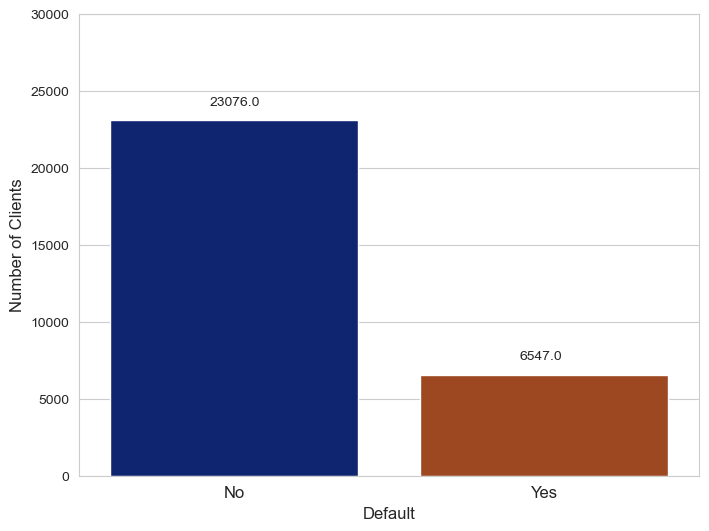

In [11]:
plt.figure(figsize=(8,6))

ax = sns.countplot(x="default", data=df, palette="dark")

plt.xlabel("Default", fontsize= 12)
plt.ylabel("Number of Clients", fontsize= 12)
plt.ylim(0,30000)
plt.xticks([0,1], ['No', 'Yes'], fontsize = 12)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+1000))
    
plt.show()

The difference between no default and default is huge. This type of class imbalance can be handled using many techniques such as Resampling, Synthetic Minority Over-sampling Technique, Data augmentation. We will see these techniques later in this project.

In [12]:
df['SEX'].value_counts()

2    17880
1    11743
Name: SEX, dtype: int64

In [13]:
df['default'].groupby(df['SEX']).value_counts(normalize = True)

SEX  default
1    0          0.75892
     1          0.24108
2    0          0.79217
     1          0.20783
Name: default, dtype: float64

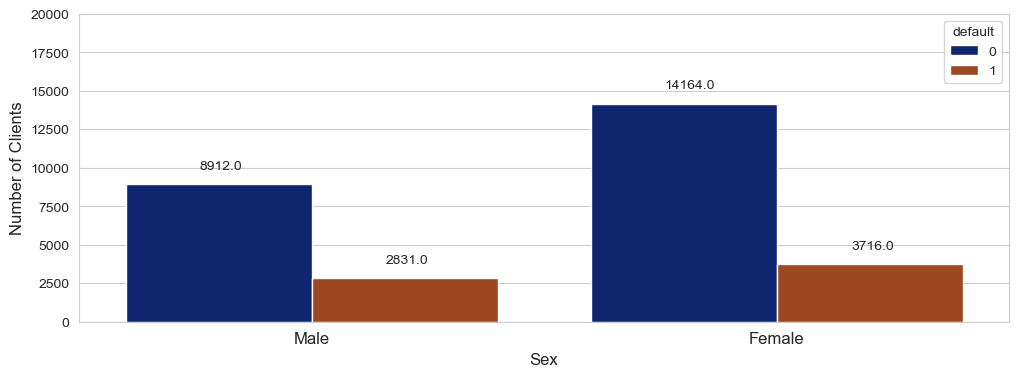

In [14]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'SEX', hue="default", palette = 'dark')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("Number of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

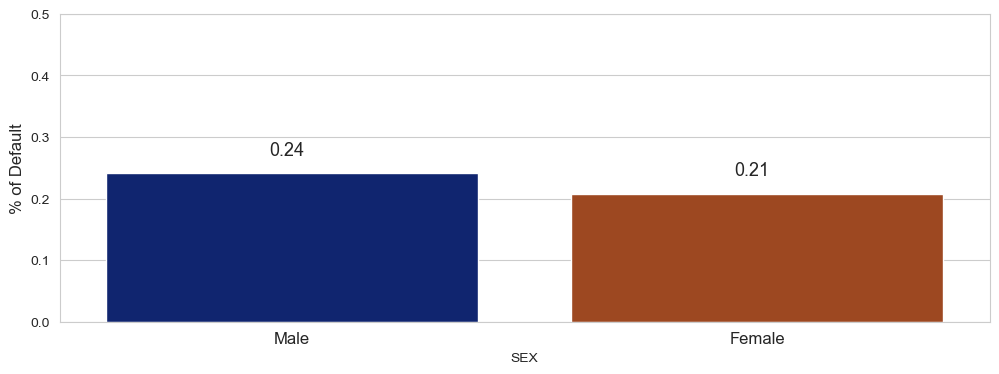

In [15]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "SEX", y = "default", data = df, palette = 'dark', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.03),fontsize=13)

plt.show()

From above plots, we can tell that there are more women than men in the dataset. Men have a slightly higher chance of default. We will compare more by considering marital status, education of both sex.

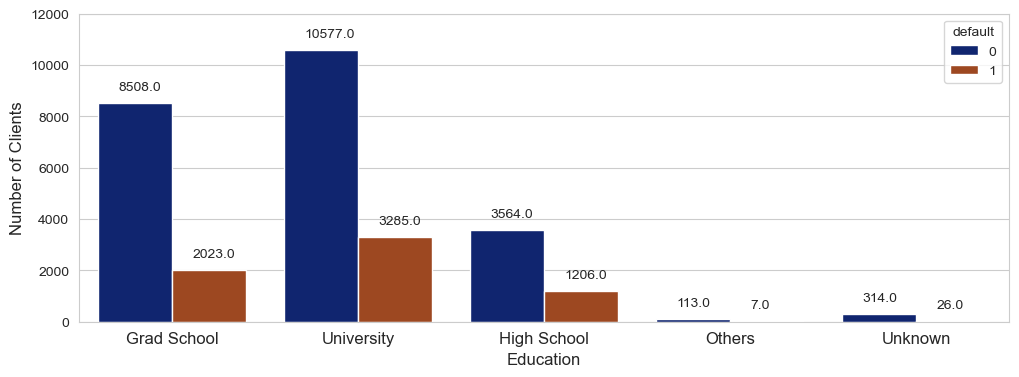

In [16]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'EDUCATION', hue="default", palette = 'dark')

plt.xlabel("Education", fontsize= 12)
plt.ylabel("Number of Clients", fontsize= 12)
plt.ylim(0,12000)
plt.xticks([0,1,2,3,4],['Grad School','University','High School','Others','Unknown'], fontsize = 12)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))

plt.show()

The Education category is mostly dominated by University, Grad school, high school in order. Considering these three levels, it seems that a higher education translates to a lower chance of default.

In [17]:
df['default'].groupby(df['MARRIAGE']).value_counts(normalize = True)

MARRIAGE  default
1         0          0.765283
          1          0.234717
2         0          0.790717
          1          0.209283
Name: default, dtype: float64

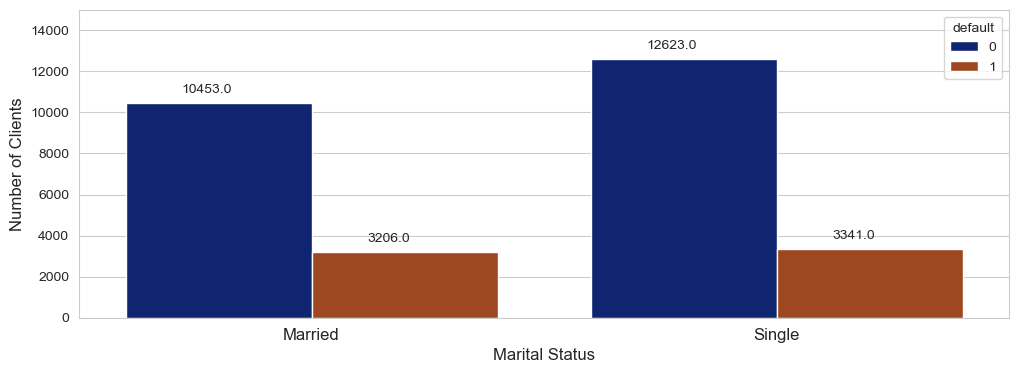

In [18]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df, x = 'MARRIAGE', hue="default", palette = 'dark')

plt.xlabel("Marital Status", fontsize= 12)
plt.ylabel("Number of Clients", fontsize= 12)
plt.ylim(0,15000)
plt.xticks([0,1],['Married', 'Single'], fontsize = 12)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+500))

plt.show()

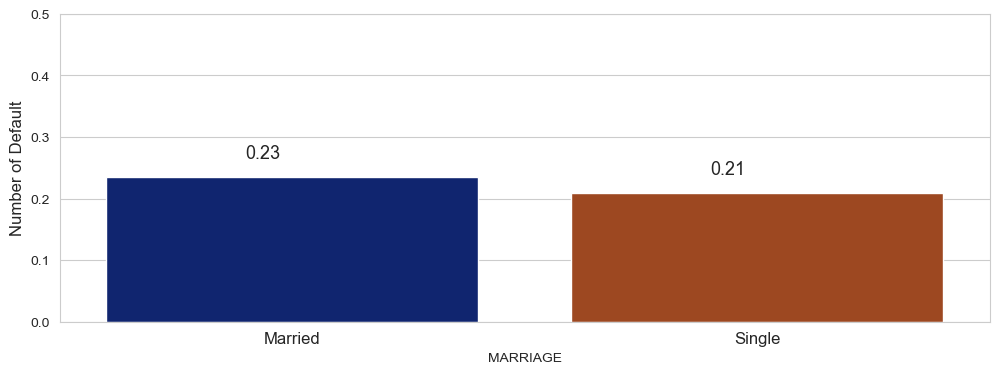

In [19]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "MARRIAGE", y = "default", data = df, palette = 'dark', ci = None)

plt.ylabel("Number of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Married', 'Single'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

Those who are single have slightly lower chance of default. So far, we have seen that are men are more likely to be default. We will make more comparison of with respect to marital status and education.

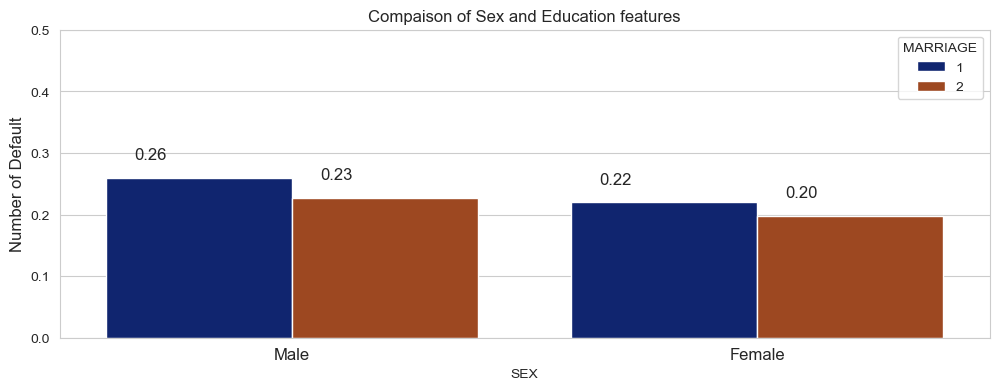

In [20]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "SEX", y = "default", hue = "MARRIAGE", data = df, palette = 'dark', ci = None)

plt.title('Compaison of Sex and Education features')
plt.ylabel("Number of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03),fontsize=12)

plt.show()

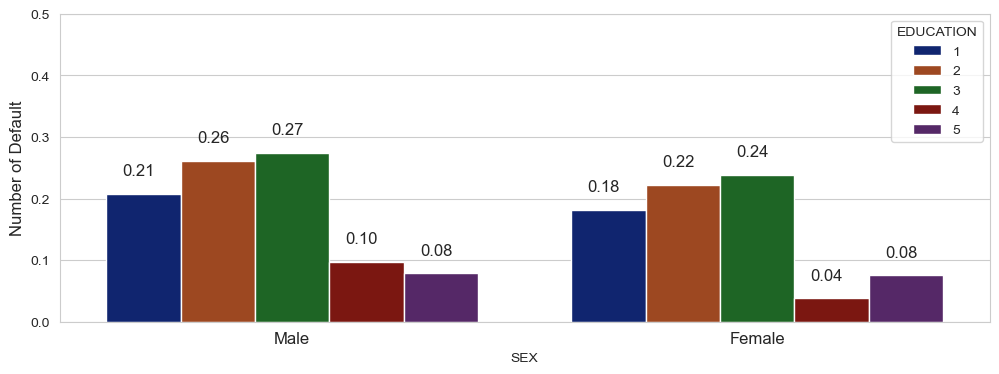

In [21]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "SEX", y = "default", hue = "EDUCATION", data = df, palette = 'dark', ci = None)

plt.ylabel("Number of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.035, p.get_height()+0.03),fontsize=12)

plt.show()

From both plots and analysis conducted so far, the probability of default is higher for men.

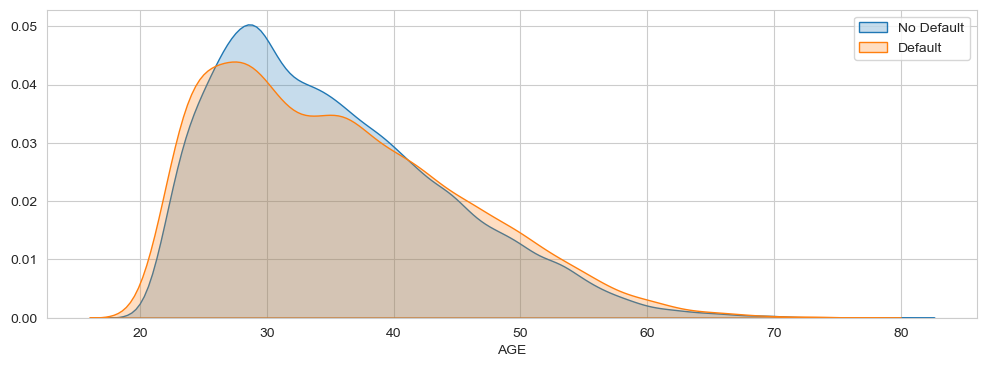

In [22]:
plt.figure(figsize=(12,4))

sns.kdeplot(df.loc[(df['default'] == 0), 'AGE'], label = 'No Default', shade = True)
sns.kdeplot(df.loc[(df['default'] == 1), 'AGE'], label = 'Default', shade = True)
plt.ylabel('')
plt.legend()
plt.show()

Majority of people in dataset are between age 25 to 40 years. We can divide age groups in bins and do more in depth analysis. 

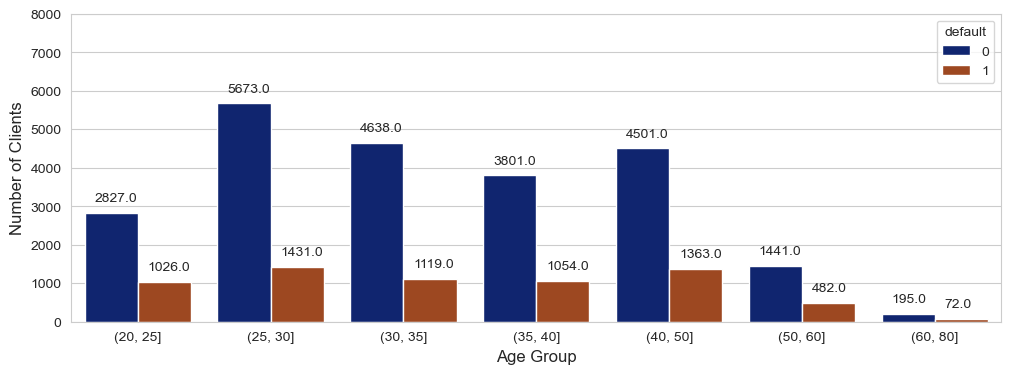

In [23]:
plt.figure(figsize=(12,4))
df['AgeBin'] = pd.cut(df['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])
df['AgeBin'] = df['AgeBin'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']

ax = sns.countplot(data = df, x = 'AgeBin', hue="default", palette = 'dark', order = AgeBin_order)

plt.xlabel("Age Group", fontsize= 12)
plt.ylabel("Number of Clients", fontsize= 12)
plt.ylim(0,8000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()
df.drop('AgeBin', axis=1, inplace=True)

As seen from plots, lowest chances of default are registered around 30-35 years old, while the highest occurs at 20-25 and 60+ years. Next we will analyze credit limits of clients. 

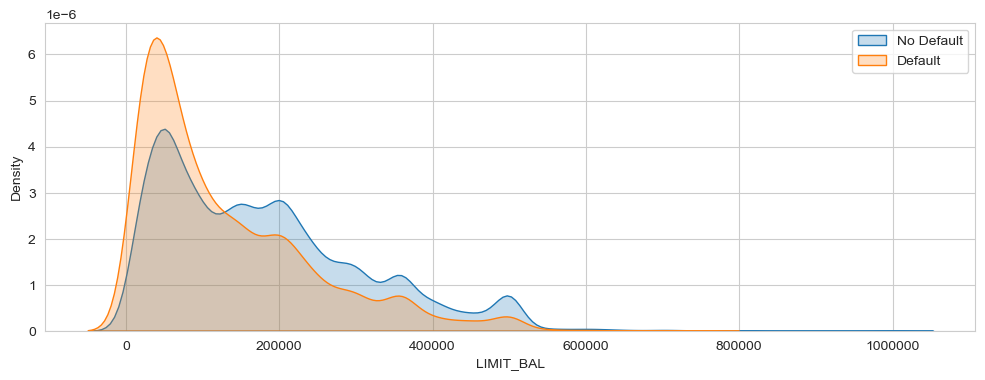

In [24]:
plt.figure(figsize=(12,4))

sns.kdeplot(df.loc[(df['default'] == 0), 'LIMIT_BAL'], label = 'No Default', shade = True)
sns.kdeplot(df.loc[(df['default'] == 1), 'LIMIT_BAL'], label = 'Default', shade = True)
plt.ticklabel_format(style='plain', axis='x') 
plt.legend()
plt.show()

Majority of clients have limit lesser than 200K and more number of default clients are also in same limit range. In similar fashion, we can analyze payment history, billed amount and due payments to find patterns within the data. We will go ahead with finding correlation among features.

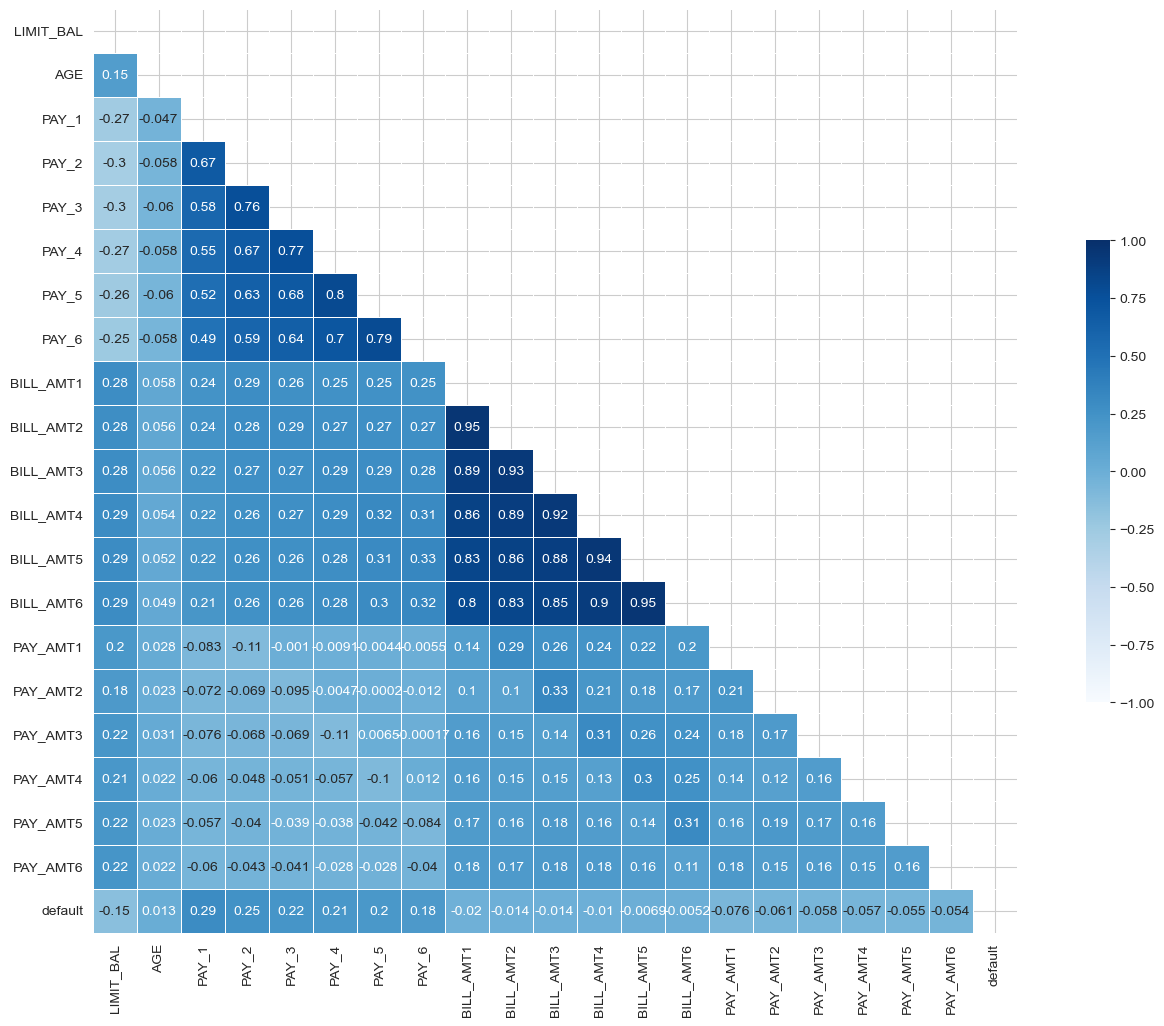

In [25]:
numeric = ['LIMIT_BAL','AGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6', 'default']
corr = df[numeric].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(18,12))
ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cmap='Blues', cbar_kws={'shrink': .5}, annot=True, annot_kws={'size': 10})
cbar = ax.collections[0].colorbar

From above plot, we can see there is strong correlation between BILL_AMTn features indicating that information can be redundant.

<A id='preprocessing'></a>
# 4. Data Preprocessing

In this section, we will focus on handling categorical feature, dataset partition, features scaling, dimensionality reduction and handling class imbalances. These are some of the essential preprocessing techniques so that the machine learning algoirthm can learn correct patterns from the data.

In [26]:
df['GRAD_SCHOOL'] = (df['EDUCATION'] == 1).astype('category')
df['UNIVERSITY'] = (df['EDUCATION'] == 2).astype('category')
df['HIGH_SCHOOL'] = (df['EDUCATION'] == 3).astype('category')
df.drop('EDUCATION', axis=1, inplace=True)

df['MALE'] = (df['SEX'] == 1).astype('category')
df.drop('SEX', axis=1, inplace=True)

df['MARRIED'] = (df['MARRIAGE'] == 1).astype('category')
df.drop('MARRIAGE', axis=1, inplace=True)

df.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,GRAD_SCHOOL,UNIVERSITY,HIGH_SCHOOL,MALE,MARRIED
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,24,3,3,-1,-1,-1,-1,3913,3102,...,0,0,0,0,1,False,True,False,False,True
2,120000,26,-1,3,1,1,1,3,2682,1725,...,1000,1000,0,2000,1,False,True,False,False,False
3,90000,34,1,1,1,1,1,1,29239,14027,...,1000,1000,1000,5000,0,False,True,False,False,False
4,50000,37,1,1,1,1,1,1,46990,48233,...,1200,1100,1069,1000,0,False,True,False,False,True
5,50000,57,-1,1,-1,1,1,1,8617,5670,...,10000,9000,689,679,0,False,True,False,True,True


In above cell, we performed one hot encodng on columns containing multiple categories which were EDUCATION, SEX and MARRIAGE. Next we will partition the data into training and test set.

In [27]:
y = df['default']
x = df.drop('default', axis=1, inplace=False)

x_train_raw, x_test_raw, y_train, y_test = train_test_split(x, y, random_state=32, stratify=y)

In [28]:
scaler = MinMaxScaler()
columns_to_scale = ['LIMIT_BAL', 'AGE'] + [f'PAY_{i}' for i in range(1, 7)] + [f'BILL_AMT{i}' for i in range(1, 7)] + [f'PAY_AMT{i}' for i in range(1, 7)]

x_train_norm = x_train_raw.copy()
x_test_norm = x_test_raw.copy()

for column in columns_to_scale:
    column_values_train = x_train_raw[column].values.reshape(-1, 1)
    column_values_test = x_test_raw[column].values.reshape(-1, 1)

    x_train_norm[column] = scaler.fit_transform(column_values_train)
    x_test_norm[column] = scaler.transform(column_values_test)

In [29]:
scaler = StandardScaler()
columns_to_scale = ['LIMIT_BAL', 'AGE'] + [f'PAY_{i}' for i in range(1, 7)] + [f'BILL_AMT{i}' for i in range(1, 7)] + [f'PAY_AMT{i}' for i in range(1, 7)]

x_train_std = x_train_raw.copy()
x_test_std = x_test_raw.copy()

for column in columns_to_scale:
    column_values_train = x_train_raw[column].values.reshape(-1, 1)
    column_values_test = x_test_raw[column].values.reshape(-1, 1)

    x_train_std[column] = scaler.fit_transform(column_values_train)
    x_test_std[column] = scaler.transform(column_values_test)

We will explore how two different types of scaling techniques affect model's performance. Next we will focus on dimensionality reduction. We will use Principal Component Analysis. PCA identifies patterns in data on the basis correlation. It finds the direction of maximum variance and projects data onto a new space with equal or fewer dimensions. At first, we will figure out number of principal components containing maximum variance.

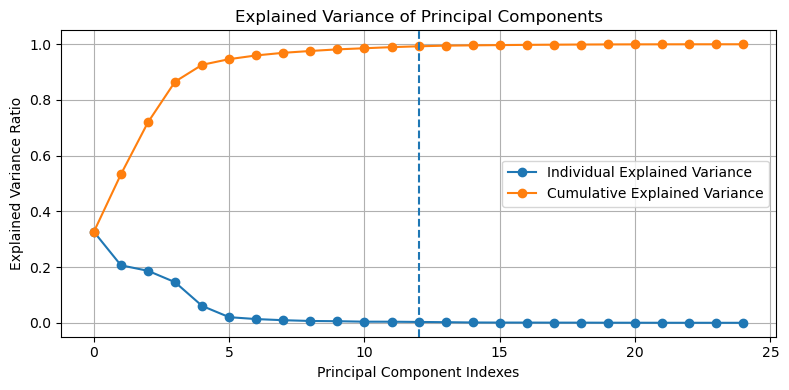

In [30]:
pc = len(x_train_norm.columns.values) 
pca = PCA(n_components=pc)
pca.fit(x_train_norm)

sns.reset_orig()
sns.set_color_codes('pastel')
plt.figure(figsize = (8,4))
plt.grid()
plt.title('Explained Variance of Principal Components')
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.legend(["Individual Explained Variance", "Cumulative Explained Variance"])
plt.xlabel('Principal Component Indexes')
plt.ylabel('Explained Variance Ratio')
plt.tight_layout()
plt.axvline(12, 0, ls='--')
plt.show()

From above plot, we can tell that first 5 principal components contain maximum variance. However, we will choose 12 principal components so that variance upto 99% is captured. We fit PCA only on training set and then project test data on subspace generated by principal components.

In [31]:
pc = 12
pca = PCA(n_components=pc)
pca.fit(x_train_norm)
x_train = pd.DataFrame(pca.transform(x_train_norm))
x_test = pd.DataFrame(pca.transform(x_test_norm))
x_train.columns = ['PC' + str(i) for i in range(1, pc+1)]
x_test.columns = ['PC' + str(i) for i in range(1, pc+1)]
x_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-0.544800,-0.519521,-0.488955,0.165296,0.048140,-0.027678,-0.017171,-0.014664,0.062271,-0.000182,-0.007433,-0.004867
1,0.831674,-0.257594,-0.503202,-0.004008,0.111120,-0.142181,0.097083,0.170298,0.012575,0.233160,0.049403,-0.089120
2,0.022352,1.118766,-0.083279,0.616660,-0.472185,0.247120,0.437808,-0.036825,-0.085847,0.023876,-0.020124,0.007072
3,-0.754161,0.339731,-0.323912,-0.279624,0.095884,-0.099510,-0.036483,-0.032483,-0.035035,-0.006847,-0.006940,0.004857
4,-0.548751,-0.533966,-0.490052,0.175396,0.111616,-0.084176,-0.060572,-0.108292,0.024609,-0.077020,-0.062586,0.085257


Next we will deal with class imbalances. Let's look at defaulter and non-defaulter ratio in training data.

In [32]:
nondefaulters = (y_train[y_train==0]).count()
defaulters = (y_train[y_train==1]).count()
print(f'Count of non-defaulters: {nondefaulters}')
print(f'Count of defaulters: {defaulters}')

Count of non-defaulters: 17307
Count of defaulters: 4910


We will primarily use SMOTE and K-means SMOTE here. SMOTE has avantage of lesser risk of overfitting compared to traditional random oversampling. In random oversampling, duplicate entries of minority class are generated, whereas, SMOTE generated artificial samples. This is achievd by taking linear interpolation of one of the minority sample and its neighboring minority sample.

On the other hand, K-means SMOTE use K-means clustering algorithm in pair with SMOTE oversampling.

In [33]:
oversample = SMOTE(random_state=24)
x_train_smote, y_train_smote = oversample.fit_resample(x_train, y_train)

class_count = [y_train_smote[y_train_smote == 0].count(), y_train_smote[y_train_smote == 1].count()]
class_count_df = pd.DataFrame(data=class_count, index = ['Non-defaulters','Defaulters'], columns=['Number'])

print('Training set class numbers after SMOTE Oversampling')
class_count_df

Training set class numbers after SMOTE Oversampling


,Number
Non-defaulters,17307
Defaulters,17307


In [34]:
oversample = KMeansSMOTE(cluster_balance_threshold=0.00001, random_state=24)
x_train_ksmote, y_train_ksmote = oversample.fit_resample(x_train, y_train)
class_count = [y_train_ksmote[y_train_ksmote == 0].count(), y_train_ksmote[y_train_ksmote == 1].count()]
class_count_df = pd.DataFrame(data=class_count, index = ['Non-defaulters','Defaulters'], columns=['Number'])

print('Training set class numbers after SMOTE Oversampling')
class_count_df

Training set class numbers after SMOTE Oversampling


,Number
Non-defaulters,17307
Defaulters,17311


<a id='Classification'></a>
# 5. Classification Models

We will implement Logistic Regression and Support Vector Machine models for predicting default/non-default clients. For each model, we will use different pre-processing operations which will be combination of PCA, SMOTE oversampling and K-means SMOTE.

In [35]:
def plot_results(res, resampling_method, y_pred, y_true):

    fig = plt.figure(figsize=(12,4))
    gspace = fig.add_gridspec(nrows=1, ncols=6, left=0.1, right=0.90, wspace=0.5, hspace=0.5)
    ax1 = fig.add_subplot(gspace[0,0:3])
    ax2 = fig.add_subplot(gspace[0,3:5])

    plot_x = []
    plot_y = []

    for i in range(len(res)):
        plot_x.append(res[i])
        plot_y.append(resampling_method[i])

    df = pd.DataFrame({'x':plot_x, 'y': plot_y}).sort_values(['x'], ascending=False)

    sns.barplot(data=df, x='x', y='y', palette='Blues', ax=ax1)
    ax1.set_xlabel("F1-score", fontsize="12")
    ax1.set_ylabel("")
    ax1.set_yticklabels(df.y,fontsize="12")

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot = True, 
                cmap=plt.cm.Blues, 
                annot_kws={"size": 14},
                linecolor = 'w',
                linewidth = 4,ax=ax2,
                fmt='d'
               )
    
    ax2.set_xlabel("Predicted labels",fontsize="12")
    ax2.set_ylabel("True labels",fontsize="12")
    
    return plt

In [36]:
def plot_test_scores(model, oversample, plot):
    
    if oversample == 'raw':
        X_test_s = x_test_norm.copy()
    else:
        X_test_s = x_test.copy()
    
    y_pred = model.predict(X_test_s)
    
    test_acc = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    test_auc = auc(recall, precision)
    test_f1 = f1_score(y_test, y_pred)
    
    print("Test Scores:")
    print(f"- Accuracy:\t{test_acc}")
    print(f"- Recall:\t{test_recall}")
    print(f"- Precision:\t{test_precision}")
    print(f"- F1-score:\t{test_f1}")
    print(f"- AUC:\t\t{test_auc}")
    
    #plot results
    if plot:
        fig, axs = plt.subplots(1, 3, figsize=(15,4))
        
        tmp = pd.DataFrame({'Feature': X_test_s.columns, 
                            'Feature importance': model.best_estimator_.feature_importances_})
        tmp = tmp.sort_values(by='Feature importance', ascending=False)
        s = sns.barplot(x='Feature', y='Feature importance', data=tmp, ax=axs[0])
        s.set_xticklabels(s.get_xticklabels(), rotation=90)
        
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = plt.cm.Blues, normalize='true', ax=axs[1])
        no_skill = len(y_test[y_test==1]) / len(y_test)
        PrecisionRecallDisplay.from_estimator(model, X_test_s, y_test, ax=axs[2])
        plt.axhline(no_skill, 0, ls='--', label='No Skill')
        plt.ylim([-0.05, 1.05])
        axs[2].legend(loc = 'upper right')
        plt.show()
    else:
        fig, axs = plt.subplots(1, 2, figsize=(10,4))
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap = plt.cm.Blues, normalize='true', ax=axs[0])
        no_skill = len(y_test[y_test==1]) / len(y_test)
        PrecisionRecallDisplay.from_estimator(model, X_test_s, y_test, ax=axs[1])
        plt.axhline(no_skill, 0, ls='--', label='No Skill')
        plt.ylim([-0.05, 1.05])
        axs[1].legend(loc = 'upper right')
        plt.show()
    
    return test_acc, test_recall, test_precision, test_f1, test_auc

In [37]:
def pipeline(model, params, oversample=None, plot=False):
    
    max_f1 = 0
    y_pred_max = 0
    y_test_max = 0
    
    if oversample:
        if oversample == 'raw': 
            X_train_s = x_train_norm.copy() 
            y_train_s = y_train.copy()
            X_test_f1 = x_test_raw.copy()
        else:
            X_train_s, y_train_s = oversample.fit_resample(x_train, y_train)
            X_test_f1 = x_test.copy()
    else:
        X_train_s = x_train.copy() 
        y_train_s = y_train.copy()
        X_test_f1 = x_test.copy()
    
    #gridsearch best parameter
    gridsearch = GridSearchCV(estimator = model, param_grid = params, scoring = 'f1', cv = 5, 
                      n_jobs = -1, verbose = True)
    gridsearch.fit(X_train_s, y_train_s)
    print(f"Best parameters:\t{gridsearch.best_params_}")
    print(f"Best validation score:\t{gridsearch.best_score_}")
    
    test_scores = plot_test_scores(gridsearch, oversample, plot)
    
    best_estimator = gridsearch.best_estimator_
    
    # save best config
    y_pred = best_estimator.predict(X_test_f1)
    f1 = round(f1_score(y_test, y_pred),2)

    if f1 > max_f1:
        y_pred_max = y_pred
        y_test_max = y_test
        max_f1 = f1
    
    return test_scores, y_pred_max, y_test_max

In [38]:
oversample_methods = ['raw',
                      None,
                      SMOTE(random_state=36),
                      KMeansSMOTE(cluster_balance_threshold=1e-2, random_state=36)]

oversample_names = ['Raw Data',
                    'PCA',
                    'PCA + SMOTE Oversampling',
                    'PCA + KMeansSMOTE Oversampling']

scores_logistic = {'Accuracy':[float for i in range(len(oversample_methods))],
                   'Recall':[float for i in range(len(oversample_methods))],
                   'Precision':[float for i in range(len(oversample_methods))],
                   'F1-score':[float for i in range(len(oversample_methods))],
                   'AUC':[float for i in range(len(oversample_methods))]}

Logistic Regression with Raw Data
Fitting 5 folds for each of 6 candidates, totalling 30 fits


Best parameters:	{'C': 100.0}
Best validation score:	0.29210961723194734
Test Scores:
- Accuracy:	0.7994869025114771
- Recall:	0.1649358582773366
- Precision:	0.6958762886597938
- F1-score:	0.26666666666666666
- AUC:		0.5226961085752354


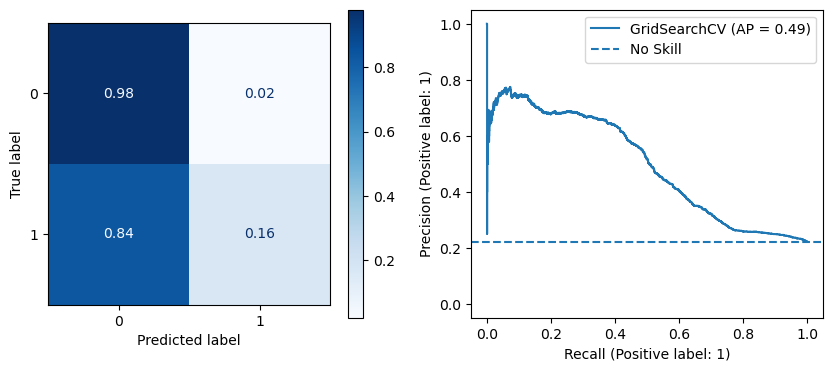

Logistic Regression with PCA
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters:	{'C': 100.0}
Best validation score:	0.28897982723319937
Test Scores:
- Accuracy:	0.7998919794761005
- Recall:	0.16554673182651192
- Precision:	0.7002583979328165
- F1-score:	0.26778656126482214
- AUC:		0.5251250871588973


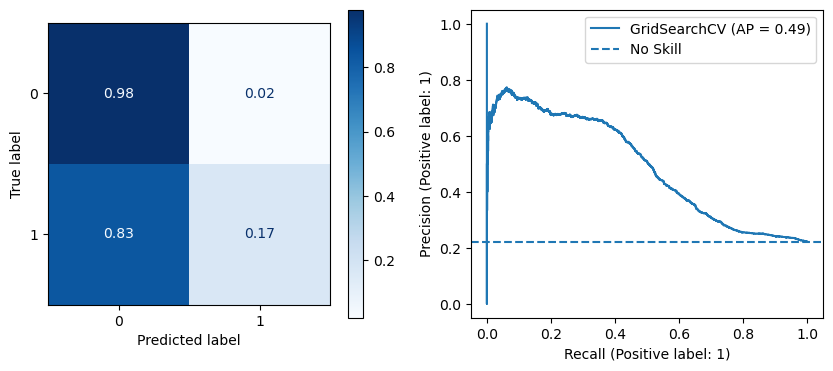

Logistic Regression with PCA + SMOTE Oversampling
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters:	{'C': 1.0}
Best validation score:	0.6599289014335394
Test Scores:
- Accuracy:	0.6339454496354308
- Recall:	0.662797800855223
- Precision:	0.3344636251541307
- F1-score:	0.4445810284777709
- AUC:		0.5358977937500184


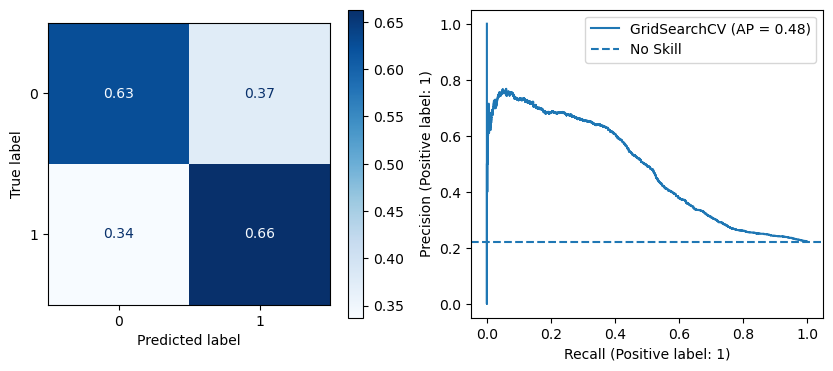

Logistic Regression with PCA + KMeansSMOTE Oversampling
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters:	{'C': 100.0}
Best validation score:	0.7423426016870776
Test Scores:
- Accuracy:	0.7137456116662165
- Recall:	0.31704337202199145
- Precision:	0.34122287968441817
- F1-score:	0.3286890436985434
- AUC:		0.40461246692800906


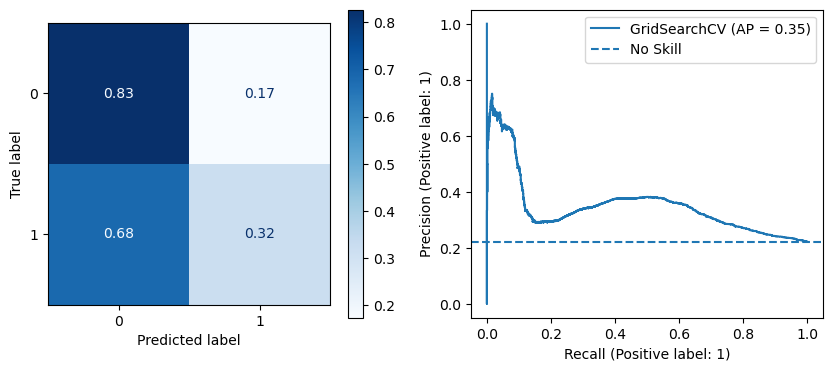

In [39]:
params_lr = {'C': [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]}

for idx, oversample in enumerate(oversample_methods):
    print(f'Logistic Regression with {oversample_names[idx]}')
    scores, y_pred, y_true = pipeline(LogisticRegression(random_state=36, max_iter=1000,n_jobs=-1), params_lr, oversample)
    scores_logistic['Accuracy'][idx] = scores[0]
    scores_logistic['Recall'][idx] = scores[1]
    scores_logistic['Precision'][idx] = scores[2]
    scores_logistic['F1-score'][idx] = scores[3]
    scores_logistic['AUC'][idx] = scores[4]

scores_lr_df = pd.DataFrame(data=scores_logistic, index=oversample_names)
plot = plot_results(scores_lr_df["F1-score"], oversample_names, y_pred, y_true)

In [40]:
oversample_methods = ['raw',
                      None,
                      SMOTE(random_state=36),
                      KMeansSMOTE(cluster_balance_threshold=1e-5, random_state=36)]

oversample_names = ['Raw Data',
                    'PCA',
                    'PCA + SMOTE Oversampling',
                    'PCA + KMeansSMOTE Oversampling']

scores_svm = {'Accuracy':[float for i in range(len(oversample_methods))],
                   'Recall':[float for i in range(len(oversample_methods))],
                   'Precision':[float for i in range(len(oversample_methods))],
                   'F1-score':[float for i in range(len(oversample_methods))],
                   'AUC':[float for i in range(len(oversample_methods))]}

Support Vector Machine with Raw Data
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters:	{'C': 100.0}
Best validation score:	0.4530282285481336
Test Scores:
- Accuracy:	0.8192006481231434
- Recall:	0.3304825901038485
- Precision:	0.6900510204081632
- F1-score:	0.4469227591904172
- AUC:		0.5842608641271914


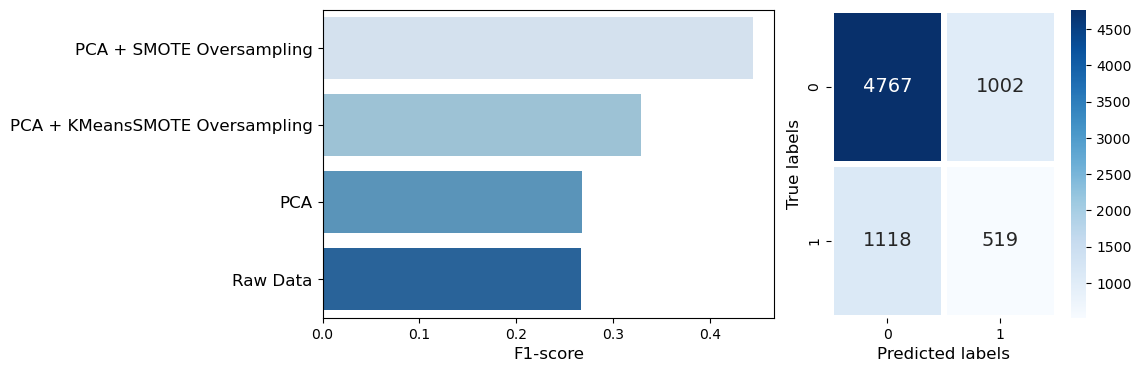

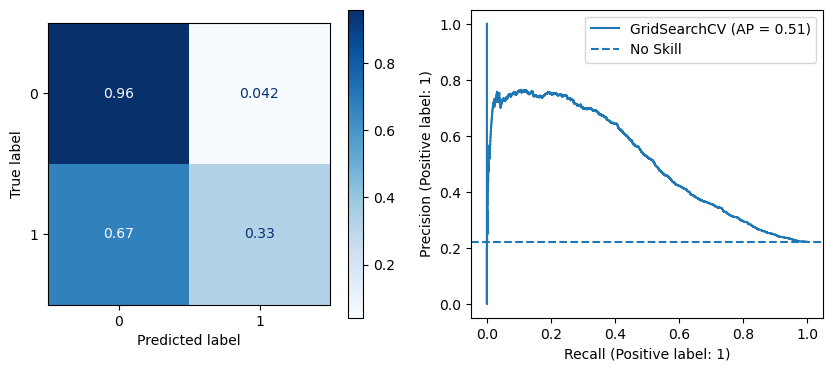

Support Vector Machine with PCA
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters:	{'C': 10.0}
Best validation score:	0.4634800231977173
Test Scores:
- Accuracy:	0.8217661355657575
- Recall:	0.36713500305436775
- Precision:	0.6790960451977401
- F1-score:	0.4766058683584457
- AUC:		0.5930588133510066


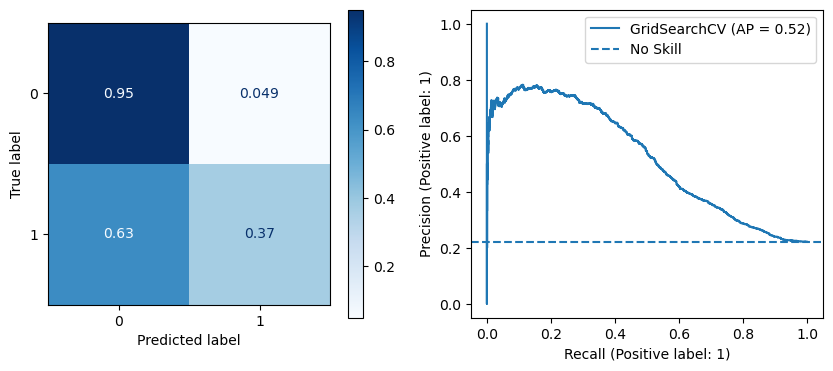

Support Vector Machine with PCA + SMOTE Oversampling
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters:	{'C': 100.0}
Best validation score:	0.672118522178247
Test Scores:
- Accuracy:	0.7696462327842291
- Recall:	0.5687232742822236
- Precision:	0.48213360952874157
- F1-score:	0.5218609865470851
- AUC:		0.573092498076155


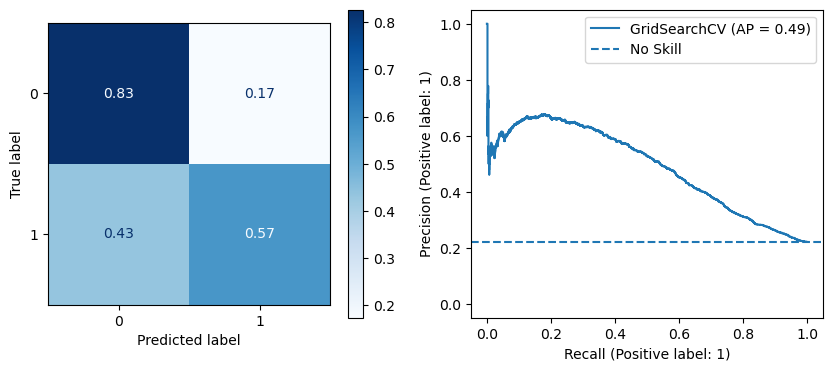

Support Vector Machine with PCA + KMeansSMOTE Oversampling
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters:	{'C': 100.0}
Best validation score:	0.7648759422728462
Test Scores:
- Accuracy:	0.7399405887118553
- Recall:	0.46426389737324375
- Precision:	0.4201216141514649
- F1-score:	0.44109112013929197
- AUC:		0.5014015054247901


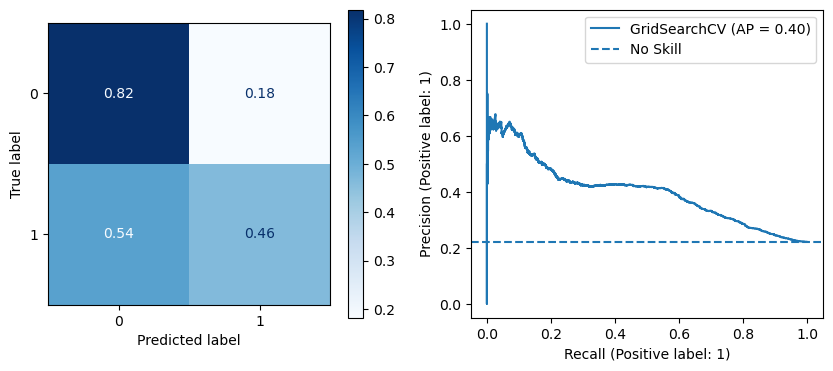

In [41]:
params_svm = {'C': [1e-1, 1e0, 1e1, 1e2],
              'kernel':['rbf', 'poly'],
              'gamma': [1e-1, 'scale']}

for idx, oversample in enumerate(oversample_methods):
    print(f'Support Vector Machine with {oversample_names[idx]}')
    scores, y_pred, y_true = pipeline(SVC(), params_lr, oversample)
    scores_svm['Accuracy'][idx] = scores[0]
    scores_svm['Recall'][idx] = scores[1]
    scores_svm['Precision'][idx] = scores[2]
    scores_svm['F1-score'][idx] = scores[3]
    scores_svm['AUC'][idx] = scores[4]

scores_svm_df = pd.DataFrame(data=scores_svm, index=oversample_names)
plot = plot_results(scores_svm_df["F1-score"], oversample_names, y_pred, y_true)

In [42]:
combined_scores = [scores_lr_df, scores_svm_df]
combined_scores_df = pd.concat(combined_scores, keys=['Logistic Regression', 'Support Vector Machine'])
combined_scores_df

Accuracy    Recall  \
Logistic Regression    Raw Data                        0.799487  0.164936   
                       PCA                             0.799892  0.165547   
                       PCA + SMOTE Oversampling        0.633945  0.662798   
                       PCA + KMeansSMOTE Oversampling  0.713746  0.317043   
Support Vector Machine Raw Data                        0.819201  0.330483   
                       PCA                             0.821766  0.367135   
                       PCA + SMOTE Oversampling        0.769646  0.568723   
                       PCA + KMeansSMOTE Oversampling  0.739941  0.464264   

                                                       Precision  F1-score  \
Logistic Regression    Raw Data                         0.695876  0.266667   
                       PCA                              0.700258  0.267787   
                       PCA + SMOTE Oversampling         0.334464  0.444581   
                       PCA + KMeansSMOTE Oversampling   0.341223  0.328689   
Support Vector Machine Raw Data                         0.690051  0.446923   
                       PCA                              0.679096  0.476606   
                       PCA + SMOTE Oversampling         0.482134  0.521861   
                       PCA + KMeansSMOTE Oversampling   0.420122  0.441091   

                                                            AUC  
Logistic Regression    Raw Data                        0.522696  
                       PCA                             0.525125  
                       PCA + SMOTE Oversampling        0.535898  
                       PCA + KMeansSMOTE Oversampling  0.404612  
Support Vector Machine Raw Data                        0.584261  
                       PCA                             0.593059  
                       PCA + SMOTE Oversampling        0.573092  
                       PCA + KMeansSMOTE Oversampling  0.501402

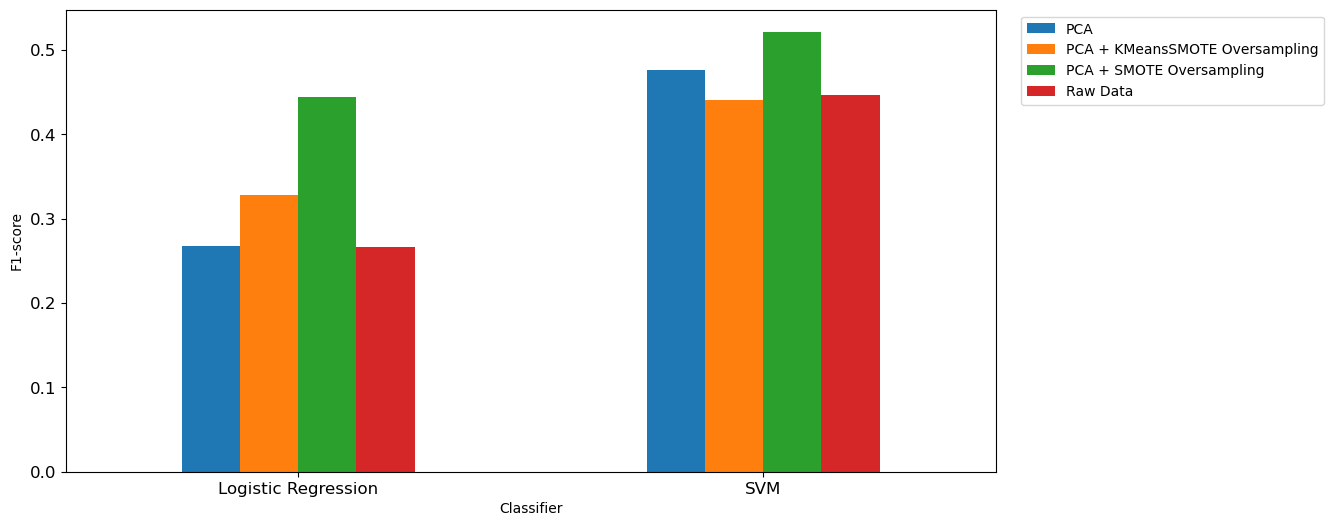

In [45]:
scores_lr_df['Classifier'] = 'Logistic Regression'
scores_lr_df['Technique'] = scores_lr_df.index

scores_svm_df['Classifier'] = 'SVM'
scores_svm_df['Technique'] = scores_svm_df.index

frames = [scores_lr_df, scores_svm_df]
scores = pd.concat(frames, ignore_index=True, keys=None)

scores.set_index(['Technique', 'Classifier']).unstack(0).plot(kind='bar', 
                                                              y='F1-score', 
                                                              ylabel='F1-score', 
                                                              figsize=(12,6), 
                                                              fontsize=12, 
                                                              rot=0).legend(bbox_to_anchor=(1.02, 1))
plt.show()

By observing above plot, we can tell SMOTE oversampling in combination with SVM yields superior performance compared to Logistic Regression and K-Meana SMOTE oversampling.

<a id=ref></a>
# References

[1] D. Dua and C. Graff, UCI Machine Learning Repository: default of credit card clients Data Set [https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients ], Irvine, CA: University of California, School of Information and Computer Science, 2019.

[2] Ying Chen, Ruirui Zhang, "Research on Credit Card Default Prediction Based on k-Means SMOTE and BP Neural Network", Complexity, Volume 2021, Article ID 6618841, 13 pages, 2021. https://doi.org/10.1155/2021/6618841.

[3] T. M. Alam et al., "An Investigation of Credit Card Default Prediction in the Imbalanced Datasets," in IEEE Access, vol. 8, pp. 201173-201198, 2020. https://doi.org/10.1109/ACCESS.2020.3033784.

[4] Matteo Merlo, "Default of Credit Card Dataset Analysis". https://github.com/MatteoM95/Default-of-Credit-Card-Clients-Dataset-Analisys.